# DSCI 100 Review Session 3 Worksheet

>## Author: Omer Tahir

### Loading relevant packages for notebook

In [3]:
## Please use your DSCI100 jupyterlab servers for this worksheet.
library(tidyverse)
library(repr)
library(broom)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

## Chapter 10: Clustering

### 10.0 Important packages for chapter 10
___

* `broom`
    - provides us with the `augment()` function
    - provides us with the `glance()` function

### 10.1 Why perform clustering?
___

As part of exploratory data analysis, it is often helpful to see if there are meaningful subgroups (or clusters) in the data; this grouping can be used for many purposes, such as:
1) _Generating new questions_
2) _Improving predictive analyses_

### 10.2 What is clustering?
___

- Clustering is a data analysis task involving separating a data set into subgroups of related data.  
- We might use clustering to separate:  
    - a data set of documents into groups that correspond to topics  
    - a data set of human genetic information into groups that correspond to ancestral subpopulations  
    - a data set of online customers into groups that correspond to purchasing behaviours. Once the data are separated  


- The way to rigorously separate the data into groups is to use a clustering algorithm.  
- In this chapter, we will focus on the **K-means algorithm**, a widely-used and often very effective clustering method, combined with the **elbow method** for selecting the number of clusters.  

### 10.3 K-means Algorithm
___

#### 10.3.1 Measuring Cluster Quality


- The **K-means algorithm** is a procedure that groups data into $K$ clusters.
- It starts with an initial clustering of the data, and then iteratively improves it by making adjustments to the assignment of data to clusters until it cannot improve any further.
- In **K-means clustering**, we measure the quality of a cluster by its within-cluster sum-of-squared-distances ($\text{WSSD}$)

Computing this involves two steps:
1. We find the cluster centers by computing the mean of each variable over data points in the cluster. For example, suppose we have a cluster containing four observations, and we are using two variables, $x$ and $y$, to cluster the data. Then we would compute the $\mu_x$  and $\mu_y$ , of the cluster center where:  
    - $\mu_x$ = `mean(x)`  
    - $\mu_y$ = `mean(y)`  

2. The second step in computing the $\text{WSSD}$ is to add up the squared distance between each point in the cluster and the cluster center. We use the straight-line / Euclidean distance formula that we learned about in the classification chapter:  
$$S^{2} = \sum_{i=1}^{N}\left( (x_i - \mu_x)^{2} + (y_i - \mu_y)^2 \right)$$  
(_$\text{WSSD}$ and $S^2$ are used interchangeably_)  
  
  

#### 10.3.2 The Clustering Algorithm


1) We begin the _K-means_ algorithm by picking $K$, and uniformly randomly assigning data to the $K$ clusters.

2) Then K-means consists of two major steps that attempt to minimize the sum of $\text{WSSD}$s over all the clusters, i.e. $\text{total WSSD}$:  
i) **Center update**: Compute the center of each cluster.  
ii) **Label update**: Reassign each data point i.e. ($x_i$,$y_i$), to the cluster with the nearest center i.e. one of the ($\mu_x$, $\mu_y$).  

_These two steps are repeated until the cluster assignments no longer change._  

3) Unlike the classification and regression models we studied in previous chapters, K-means can get “stuck” in a bad solution.
    To solve this problem when clustering data using K-means, we should randomly re-initialize the labels a few times, run K-means for each initialization, and pick the clustering that has the lowest final $\text{total WSSD}$.  

4) In order to cluster data using K-means, we also have to pick the number of clusters, $K$.  
    - If we set $K<3$, then the clustering merges separate groups of data; this causes a large $\text{total WSSD}$, since the cluster center (denoted by an “$x$”) is not close to any of the data in the cluster.  
    - If we set $K>3$, the clustering subdivides subgroups of data; this does indeed still decrease the $\text{total WSSD}$, but by only a diminishing amount.  
    - If we plot the $\text{total WSSD}$ versus the number of clusters, we see that the decrease in $\text{total WSSD}$ levels off (or forms an “**elbow shape**”) when we reach roughly the right number of clusters.  

<center><img src="data_3/kmeans.png" width=500 height=400 /></center>

#### 10.3.3 Data Preprocessing for K-Means

- **K-means** uses the Euclidean distance to compute how similar data points are to each cluster center.  
- Similar to K-nearest neighbours classification and regression, **K-means** clustering uses straight-line distance to decide which points are similar to each other.  
- Therefore, the scale of each of the variables in the data will influence which cluster data points end up being assigned.  
- To address this problem, we typically **standardize** our data before clustering, which ensures that each variable has a mean of 0 and standard deviation of 1 (scaling can however cause loss of interpretability of the variables once we plot them).  
- The `scale()` function in R can be used to do this.  

### 10.4 Common functions we may use in this chapter
___

* `map_df(df, function)`
    - 1st argument requires the dataframe whose columns will be transformed.
    - 2nd argument requires the specified function to be applied to each column of the dataframe.
    - this can be used with the `scale()` function to scale each column of the data frame.
    - when using `map_df()` we do not include the parenthesis of the function we are using.
    - Eg. `map_df(df, scale)`

## **OR**
_Note: I noticed that the UBC DSCI 100 textbook is now using a few different functions to execute the K-Means algorithm. All of these functions are alternatives to the ones in the old version which I did. They basically do the exact same thing but look more fancy. I have adjusted the code example according to the new version so that it stays familiar to all of you. `map_df()` is the older version while `mutate(df, across(everything(), function))` is the newer version.  
I will not be mentioning any functions from the old version from this point forward_

* `mutate(df, across(everything(), function))`
    - This combination of functions allows you to apply a transformation to each column.
    - It is an alternative to the above `map_df()` function.
    - 1st argument requires the dataframe whose columns will be transformed.
    - 2nd argument requires the `across()` function which makes it easy to apply the same transformation to multiple columns, allowing you to use `select()` semantics inside in "data-masking" functions like `summarise()` and `mutate()`.
        - 1st argument requires the `everything()` function which selects all variable. It is very useful in combination with other tidyselect operators i.e. `across()`
        - 2nd argument requires the specified function to be applied to each column of the dataframe.

* `rowwise()`
    * Row-wise operations require a special type of grouping where each group consists of a single row. You create this with rowwise()
    * Like `group_by()`, `rowwise()` doesn’t really do anything itself; it just changes how the other verbs work.

* `kmeans(scaled_df, nstart = ..., centers = ...)`
    * 1st argument requires the scaled dataframe
    * `nstart` argument in the kmeans function specifies the number of restarts. ***(this is done to counter bad clustering)*** (I was asked this in my Quiz 3)
    * **Bad clustering** happens because of the random selection of points which can cause the K-means algorithm to get stuck on a bad initialization and the clusters cannot be subdivided further. To counter this, we can use the `nstart` argument in the kmeans function. `nstart` tells R how many times to run the K-means algorithm using different random starts, and returns the best one.
    * centers argument specifies the number of clusters.
    * Note that since the K-means algorithm uses a random initialization of assignments, we need to set the random seed to make the clustering reproducible.

* `augment(kmeans_object, original_data)`
    * takes in the model and the original data frame, and returns a data frame with the data and the cluster assignments for each point
    * this function helps us to plot and identify different clusters.

* `glance(kmeans_object)`
    * obtains the clustering statistics (including $\text{WSSD}$) for  the K-means clustering object.
    * can be nested in the `map()` function to obtain clustering statistics for each kmeans object.

* `unnest(glanced)`
    * unpacks the data frames into simpler column data types.
    * this is used when a data frame containing clustering statistics for each k-means object is created and we want to "unpack" these statistics.
    * the reason why we have to unpack these statistics is because each value of the column/vector is a list of statistics. Therefore, these lists are nested inside each element of the vector. Each list has a common set of statistics therefore `unnest()` produces new columns/vectors for each of these statistics allowing the columns of the dataframe to have one single value rather than nested lists. 

### 10.5 K-means Algorithm Code Template
___

```{r}
set.seed(1234)

##(1)##
standardized_data <- 
    not_standardized_data |>
    select(c(...)) |>
    mutate(across(everything(), scale))

##(2)##
elbow_stats <- 
    tibble(k = 1:10) |>
    rowwise() |>
    mutate(clusters = list(kmeans(standardized_data, centers = k, nstart = ...)),       ##(i)##
           glanced = list(glance(clusters)))                                            ##(ii)##

##(3)##
clustering_statistics <- 
    elbow_stats |>
    select(-clusters) |>
    unnest(glanced)

clustering_statistics

##(4)##
elbow_plot <- 
    ggplot(clustering_statistics, aes(x = k, y = tot.withinss)) +
    geom_point(size = 2) +
    geom_line() +
    labs(x = "K",
         y = "Total within-cluster sum of squares",
         title = "Elbow Plot") +
    scale_x_continuous(breaks = 1:10) +
    theme(text = element_text(size = 20))

elbow_plot

##(5)##
optimal_kmeans_object <- kmeans(standardized_data, nstart = 10, centers = ...)
optimal_kmeans_object

##(6)##
cluster_assignments <- augment(optimal_kmeans_object, standardized_data)
cluster_assignments

##(7)##
cluster_assignments |>
    pivot_longer(cols = -.cluster, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = .cluster)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(~ category, scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20))

##(8)##
glance(optimal_kmeans_object)
```

##### **(1) <u>Pre-Process the data</u>**  
- We select the variables we want for clustering.  
- We then use `mutate(df, across(everything(), scale))` to standardize the selected variables.  

##### **(2) <u>Getting K-Means object for each $K$ value</u>**  
- To calculate the $\text{total WSSD}$ for a variety of $K$s, we will create a data frame with a column named `k` with rows containing each value of $K$ we want to run K-means with (here, 1 to 10).  
- We then use the `rowwise()` function in conjunction with `mutate()` to allow us to perform operations on each individual row. This is done because each row contains each distinct k-value which we will use as an argument to the `kmeans()` function.    
##### **(i) <u>Create clusters for each $K$ value</u>**  
- We create a new column called cluster.  
- The `kmeans()` function is nested inside the `list()` function. This is because the `kmeans()` function returns a kmeans object which cannot be stored as a value inside a vector/column. Nesting the kmeans object inside the list converts the kmeans object into a list object. List objects can be stored in a vector/column as one of its values.  
- To prevent finding a bad clustering, when clustering data using K-means, we should randomly re-initialize the labels a few times. This is done via the `nstart` argument in the kmeans function where we specify the number of restarts.  
##### **(ii) <u>Obtaining Cluster statistics for each K-MEAN object</u>**  
- Next, we apply the `glance()` function on each of the K-means clustering objects to get their respective clustering statistics (including $\text{WSSD}$). _Remember we are still operating rowwise_.  
- The output of glance is a data frame, and so we get another list column. This results in a complex data frame with 3 columns, one for K, one for the K-means clustering objects, and one for the clustering statistics.  ?

##### **(3) <u>Unnesting the Cluster statistics dataframe for each K-MEAN object</u>**  
- We first remove the kmeans object column as it overloads the table with information making it unreadable
- Finally we extract the $\text{total WSSD}$ from the glanced column. Given that each item in this column is a data frame, we will need to use the `unnest()` function to unpack the data frames into simpler column data types.  

##### **(4) <u>Elbow plot</u>**  
- Now that we have `tot.withinss` and `k` as columns in a data frame, we can make a line plot and search for the “elbow” to find which value of $K$ to use.  
-  The “bump” in the total $\text{WSSD}$ plot may be observed due to bad initialization causing the algorithm to get stuck in a bad clustering.  
  
As we add more and more clusters, this does indeed still decrease the $\text{total WSSD}$, but by only a diminishing amount. Therefore, we choose the right number of clusters when the $\text{total WSSD}$ levels off (or forms an "elbow shape"). We can observe that the decrease in $\text{total WSSD}$ forms an elbow when we reach $K$ = $k$ clusters where $k$ is the optimal number of clusters.  

##### **(5) <u>Applying K-Means function</u>**  
- To perform K-means clustering in R, we use the `kmeans()` function.  
- It takes at least two arguments: the data frame containing the data you wish to cluster, and $k$, the number of **optimal clusters**. 
- `kmeans_object[2]` returns the centers for each variable per cluster.  

##### **(6) <u>Using `augment()` to obtain info in tidy format</u>**  
- `kmeans()` has a lot of information that can be used to visualize the clusters, pick $K$, and evaluate the $\text{total WSSD}$.  
- To obtain this information in a tidy format, we use the `augment()` function, which takes in the model and the original data frame, and returns a data frame with the data and the cluster assignments for each point.  

##### **(7) <u>Visualization of the cluster assignment in tidy format</u>**  
- Now that we have this information in a tidy data frame, we can make a visualization of the cluster assignments for each point.  

##### **(8) <u>Obtaining total WSSD from glance()</u>**  
- We obtain the $\text{total WSSD}$ (`tot.withinss`) from our clustering using broom’s `glance()` function.  

### 10.6 Disadvantages of multi-dimensional data
___

* Makes it really difficult for one to interpret the different properties each clusters has.  
* Since we cannot visualize the clusters in a higher-dimensional space, it becomes difficult to assess the accuracy of our model.  

### 10.7 Review exercise for Chapter 10 (K-Means Clustering)
___

**Exercise:**  
For this exercise, from $k$ = 1 to $k$ = 10, you will calculate the total within-cluster sum of squares. You will also only use the continuous variables of the data for clustering excluding `Generation`:  
  
1. Following good practice, make sure you are using the standardized data, i.e. Pre-Process the data  
2. Create a tibble with the $k$ values. Get K-Means object for each $K$ value  
i) create a new column `poke_clusts` by applying `kmeans` to each value of `k` (set `nstart` to be 10)  
ii) create a new column `glanced` by applying `glance` to each of the results  
3. Remove the `poke_clusts` column and `unnest` the results of `glance()`  
4. Create the elbow plot  
5. Obtain the optimal number of clusters and use it to make the final kmeans object. Obtain the centers for each cluster.  
6. Obtain the key statistics of the kmeans object in a tidy format  
7. Visualize the cluster assignment  

In [7]:
pm_data <- read_csv("data_3/pokemon.csv")
pm_data

Rows: 800 Columns: 13
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (3): Name, Type 1, Type 2
dbl (9): #, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation
lgl (1): Legendary

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,TRUE
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,TRUE
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,TRUE


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
1,-1.0851804,-0.7517973,-0.7671034,-0.6844715,-0.73760572,-0.8112439,-0.62043301
2,0.2902074,0.3358016,0.2073275,0.2867168,0.03300502,0.2457576,0.09119871
3,1.4182068,0.6569424,0.9972429,0.6440481,1.36081514,0.9905991,0.99137229


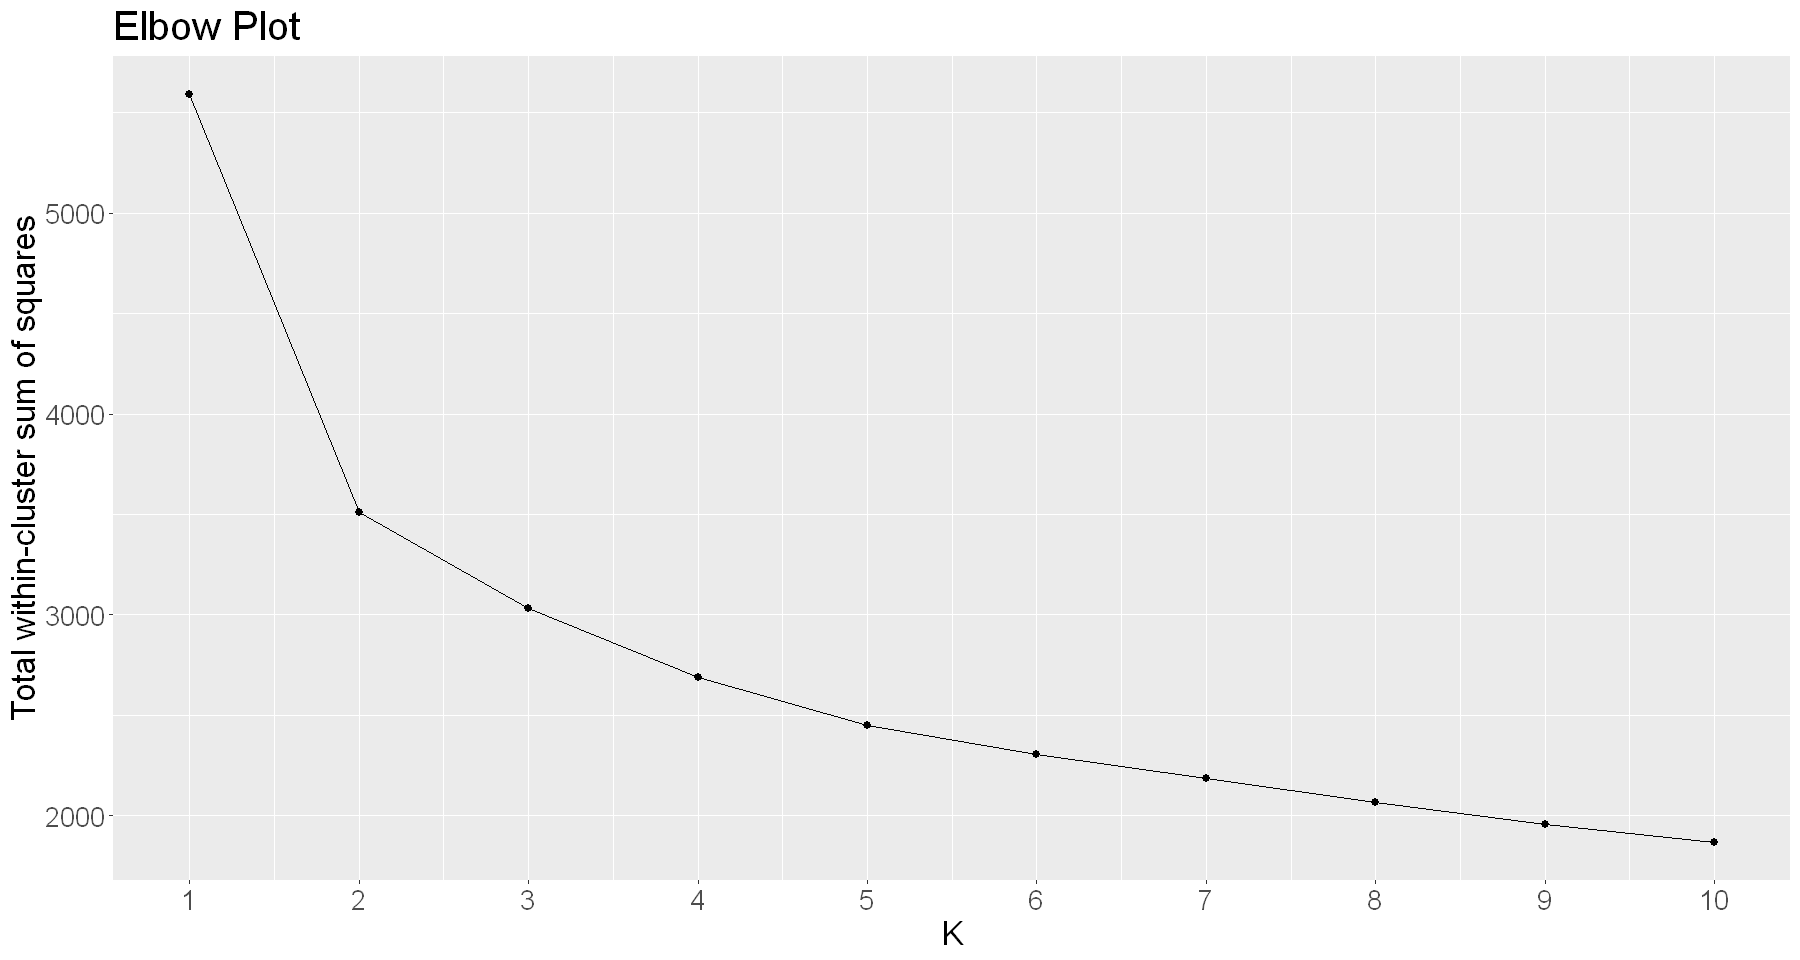

In [58]:
set.seed(2019)

##(1)##
pm_multi <- 
    pm_data |> 
    select(Total:Speed) |> 
    mutate(across(everything(), scale))

##(2)##
pm_multi_elbow_stats <- 
    tibble(k = 1:10) |>
    rowwise() |>
    mutate(poke_clusts = list(kmeans(pm_multi, centers = k, nstart = 10)),   ##(i)##
           glanced = list(glance(poke_clusts)))                              ##(ii)##

##(3)##
clustering_statistics <-
    pm_multi_elbow_stats |>
    select(-poke_clusts) |>
    unnest(glanced)

##(4)##
pm_multi_elbow_plot <- 
    ggplot(clustering_statistics, aes(x = k, y = tot.withinss)) +
    geom_point(size = 2) +
    geom_line() +
    labs(x = "K",
         y = "Total within-cluster sum of squares",
         title = "Elbow Plot") +
    scale_x_continuous(breaks = 1:10) +
    theme(text = element_text(size = 20))

pm_multi_elbow_plot

##(5)##
# looking at the elbow plot we choose k optimal = 3 clusters therefore:
pm_kmeans <- kmeans(pm_multi, centers = 3, nstart = 10)

# pm_kmeans[1] # prints clusters assigned to each observation
pm_kmeans[2] # prints cluster means
# pm_kmeans[3] # prints total sum-of-squared-differences (total SSD)
# pm_kmeans[4] # prints within-sum-of-squared-difference (WSSD) for each cluster
# pm_kmeans[5] # prints total within-sum-of-squared-differences (total WSSD)
# pm_kmeans[6] # prints total between-sum-of-squared-differences (total BSSD)
# Note: total WSSD + total BSSD = total SSD
# pm_kmeans[7] # prints size of each cluster

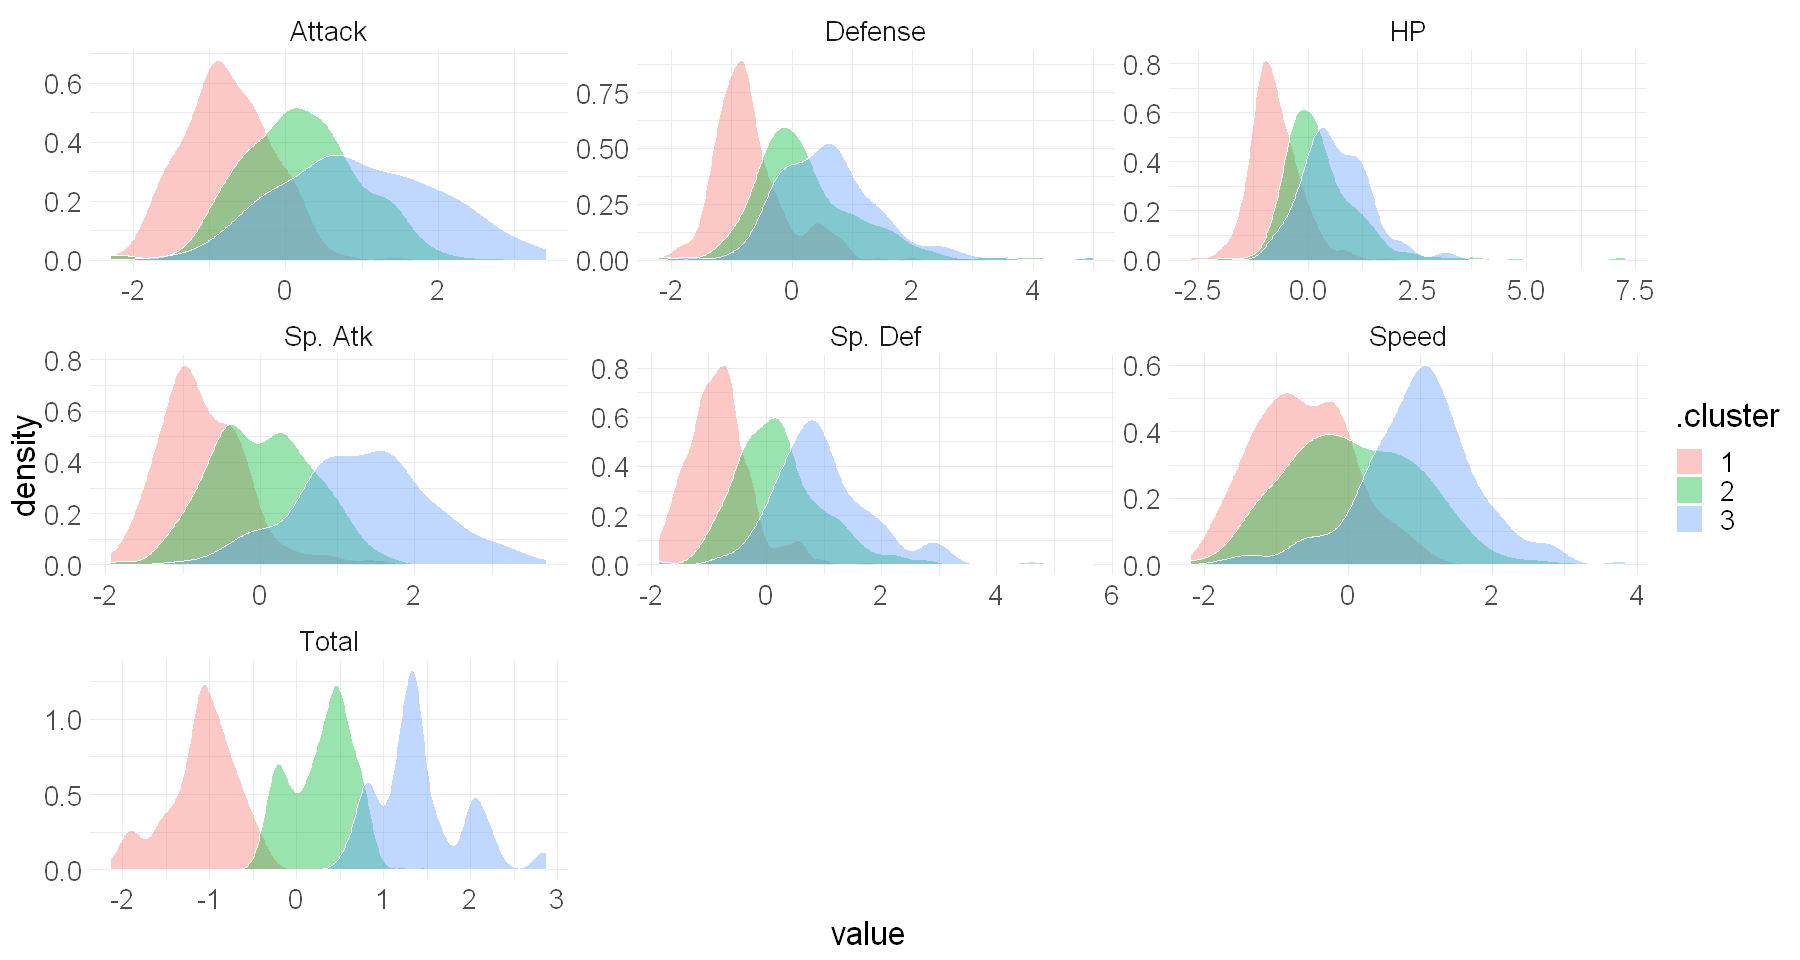

In [59]:
##(6)##
cluster_assignments <- augment(pm_kmeans, pm_multi)

##(7)##
options(repr.plot.height = 8, repr.plot.width = 15)
cluster_assignments |>
    pivot_longer(cols = -.cluster, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = .cluster)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(~ category, scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20))

## Chapter 11: Inference I (Introduction to Statistical Inference)

### 11.0 Important packages for chapter 11
___

* `infer`
    * provides us with the `rep_sample_n()` function.

### 11.1 What is inference?
___

* Data analysis questions regarding how summaries, patterns, trends, or relationships in a data set extend to the wider population are called inferential questions.  
* This chapter will introduce two common techniques in statistical inference:  
    1) Point Estimation  
    2) Interval Estimation  
  
- Data analysis questions regarding how summaries, patterns, trends, or relationships in a data set extend to the wider population are called inferential questions.  
- If our variable of interest is **Categorical**/**Binary**, the population parameter is likely to be **Population Proportion**.  
- If our variable of interest is **Quantitative**/**Continuous**, the population parameter is likely to be **Population Mean**.  

### 11.2 Definitions
___

| Terms |  Definitions |
|----------------|------------|
| <p align="left">Mean | <p align="left">The sum of all of the data observations divided by how many observations there are. |
| <p align="left">Median | <p align="left">The middle observation of a sorted variable’s data. |
| <p align="left">Variance | <p align="left">The mean of the sum of the squared distances of each observation from the mean value of all observations. |
| <p align="left">Standard deviation | <p align="left">The square root of the variance. |
| <p align="left">Proportion | <p align="left">The number of entities/object with a specific characteristic divided by the total number of entities/objects. |
| <p align="left">Observation |  <p align="left">A quantity or quality (or a set of these) from a single member of a population. |
| <p align="left">Population | <p align="left">The entire set of entities/objects of interest. |
| <p align="left">Population Parameter | <p align="left">A numerical summary value about the population. <p align="left">_(Directly computing population parameters is often time-consuming and costly, and sometimes impossible)_ |
| <p align="left">Sample | <p align="left">A subset of entities/objects in the population |
| <p align="left">Point Estimate | <p align="left"> A single-value/statistic calculated from sample data that estimates an unknown population parameter of interest. <p align="left">For example, the sample mean $\bar{x}$ is a point estimate of the population mean $\mu$. Similarly, the sample proportion $p$ is a point estimate of the population proportion $P$. <p align="left">_(High variation in the sampling distribution of the sample mean causes point estimate to be unreliable.)_|
| <p align="left">Statistical Inference | <p align="left">The process of using a sample to make a conclusion about the broader population from which it is taken is referred to as statistical inference. |
| <p align="left">Sample Variablity | <p align="left">Estimates vary from sample to sample due to sampling variability.   |
| <p align="left">Sampling Distribution | <p align="left">A distribution of point estimates, where each point estimate was calculated from a different random sample from the same population. |
| <p align="left">Random sampling | <p align="left">electing a subset of observations from a population where each observation is equally likely to be selected at any point during the selection process. |
| <p align="left">Representative sampling | <p align="left">selecting a subset of observations from a population where the sample’s characteristics are a good representation of the population’s characteristics |

### 11.3 Important Concepts
___

- A **population** has **parameters** (i.e. mean, median, sd)
- A **sample** has **statistics/point-estimates** (i.e. sample mean, sample median, sample sd)
- **Statistic/point estimate** is an estimate of the **parameter**
- A collection of **point estimates** form an **estimator.**
- An **estimator** is a random variable whose distribution is the sampling distribution for a population parameter therefore a **point estimate** is an observation of this random variable.
- From a **sample**, you can obtain the **estimator** (i.e. sampling distribution) by resampling and calculating point estimates for each re-sample.
- The **standard deviation** of the **estimator** (i.e. sampling distribution) is also called the **standard error** of the **estimator.**
- **Standard error** quantifies the variation/uncertainty associated with the **point estimates** in the **sampling distribution**.
- We use a **sampling distribution** to give a range of plausible values for a **population** **parameter**. This range of values is known as a **confidence interval.**

### 11.4 Effects of choosing a large sample size
___

1) The mean of the sample mean (across all samples) is equal to the population mean. In other words, the sampling distribution is centred at the population mean.
2) Increasing the size of the sample decreases the spread (i.e., the variability) of the sampling distribution making it more narrow. Therefore, a larger sample size results in a more reliable point estimate of the population parameter.
3) The distribution of the sample mean is roughly bell-shaped once the sample size is large enough.

### 11.5 Example code for sampling distribution 
___

```{r}
------------------------------------------------------------------------------------
SAMPLING DISTRIBUTION for SAMPLE PROPORTION
------------------------------------------------------------------------------------
set.seed(123)

samples <- rep_sample_n(airbnb, size = 40, reps = 20000)
samples

sample_estimates <- samples |>
  group_by(replicate) |>
  summarize(sample_proportion = sum(room_type == "Entire home/apt") / 40)
sample_estimates


sampling_distribution <- ggplot(sample_estimates, aes(x = sample_proportion)) +
  geom_histogram(fill = "dodgerblue3", color = "lightgrey", bins = 12) +
  xlab("Sample proportions")
sampling_distribution

sample_estimates |>
  summarize(mean = mean(sample_proportion))


------------------------------------------------------------------------------------
SAMPLING DISTRIBUTION for SAMPLE MEAN
------------------------------------------------------------------------------------
set.seed(123)

samples <- rep_sample_n(airbnb, size = 40, reps = 20000)
samples

sample_estimates <- samples |>
  group_by(replicate) |>
  summarize(sample_mean = mean(price))
sample_estimates


sampling_distribution_40 <- ggplot(sample_estimates, aes(x = sample_mean)) +
  geom_histogram(fill = "dodgerblue3", color = "lightgrey") +
  xlab("Sample mean price per night ($)") +
  theme(text = element_text(size = 20))
sampling_distribution_40
```

### 11.6 Review Questions for Chapter 11
___

_**Q1)**_ What are two parameters that are typically used to describe the centre of a distribution?

- *Median & mean*

---

_**Q2)**_ In one or two sentences, explain what a sampling distribution of sample means is in your own words. Do not use the word "distribution" in your explanation.

- *A sampling distribution of sample means is simply a collection of sample means calculated from several different samples taken from a population. These sample means are then displayed on a graph which represents the sampling distribution.*

---

_**Q3)**_ A distribution shows all possible values (or intervals) of a variable, and how often they occur?

- *TRUE*

---

_**Q4)**_ Are the following statements all true?

1. The sample distributions from different random samples will vary a bit depending on which values are captured in the sample.
2. The sample distributions from different random samples are of a similar shape to the population distribution.
3. The point estimates from different random samples are close to the true population parameter, but they vary a bit depending which values are captured in the sample
- *TRUE*

---

_**Q5)**_ Taking a random sample and calculating a point estimate is a "good guess" of the unknown population parameter you are interested in.

- *TRUE*

---

_**Q6)**_ Can you estimate a population parameter with a single point estimate?

- *A single point estimate might be inaccurate, depending on who ends up in the random sample.*

---

_**Q7)**_ The distribution of a single sample will always have a similar shape to the population distribution.

- *FALSE*

---

_**Q8)**_ How do we quantify the variation of the point estimates in a sampling distribution?

- *By using standard deviation of the sampling distribution, which is called the standard error.*

---

_**Q9)**_ Given that an "estimator" is a random variable whose distribution is the sampling distribution for a population parameter, a point estimate is an observation of a random variable.

- *TRUE*

---

_**Q10)**_ Are all the following statements TRUE?

1. As the sample size increases, the sampling distribution becomes narrower.
2. As the sample size increases, there are more sample point estimates closer to the true population mean.
3. As the sample size increases, the sampling distribution appears more bell-shaped.
4. As the sample size increases, the standard error of the estimator decreases.
- *TRUE*

---

_**Q11)**_ Why don't we always take a large number of samples when exploring sampling distributions so we can get a nice, smooth distribution?

- *Taking a large number of samples is computationally expensive.*
- *We can get a good approximation of the "smoother" sampling distribution by using less sample repetitions, but larger bin widths in our histogram.*

<br>

## Chapter 12: Inference II (Bootstrapping)

### 12.1 What is Bootstrapping?
___

- Bootstrapping is the idea of sampling from our original sample with replacement (also called resampling **with replacement**) to generate a bootstrap sampling distribution.
- Sampling with replacement means that each time we choose an observation from the population or sample, we return it before randomly selecting another.
- With this procedure, the original sample acts as an estimate of the population, and resampling with replacement gives us enough samples and results in enough sampling variation necessary to produce an approximation of the sampling distributions we have generated in the previous weeks

### 12.2 Why Bootstrapping?
___

- In **Inference I**, we had access to the population which allowed us to evaluate how accurate the estimate was, and even get a sense of how much the estimate would vary for different samples from the population.
- Often times we do not have access to the population of a variable.
- Remember that the sampling distribution allows us to study sampling variation (i.e. range of plausible values for the estimator).
- Since the (true) sampling distribution of an estimator can only be formed by taking repeated samples from the population, if we do not have access to the population, we can not create the sampling distribution.
- In this case, bootstrapping (or specifically, **bootstrap resampling with replacement)** can be very useful.
- Bootstrapping allows us to study sampling variation without taking more samples from the population to produce a sampling distribution that approximates the true sampling distribution.

### 12.3 How to create a Bootstrap (sampling) distribution from a single sample
___

For a sample of size $n$, you:

1. Randomly select an observation from the original sample, which was drawn from the population
2. Record the observation’s value
3. Replace that observation
4. Repeat steps 1 - 3 (sampling with replacement) until you have $n$ observations, which form a bootstrap sample
> Steps 1-4 give you one bootstrap sample.  
> When repeated several times, you get several bootstrap samples.  
> R creates several bootstrap samples using `rep_sample_n(size = n, replace = TRUE, reps = ...)`  
5. Calculate the bootstrap point estimate (e.g., mean, median, proportion, slope, etc.) of the $n$ observations in your bootstrap sample  
6. Repeat steps (1) - (5) many times to create a distribution of point estimates (the bootstrap distribution)  
7. Calculate the plausible range of values around our observed point estimate.  
> Step 7 is accomplished using the following code:  
>```{r}
>rep_sample_n(size = n, replace = TRUE, reps = ...) |>
        group_by(replicate) |>
        summarize(mean = mean(...))
>```


#### **<u>Example Code:</u>**


```{r}
------------------------------------------------------------------------------------
BOOTSTRAP (SAMPLE) DISTRIBUTIONS for 6 bootstrap samples
------------------------------------------------------------------------------------
boot20000 <- one_sample |>
  rep_sample_n(size = 40, replace = TRUE, reps = 20000)


#Let’s take a look at histograms of the first six replicates of our bootstrap samples.
six_bootstrap_samples <- boot20000 |>
  filter(replicate <= 6)

ggplot(six_bootstrap_samples, aes(price)) +
  geom_histogram(fill = "dodgerblue3", color = "lightgrey") +
  xlab("Price per night ($)") +
  facet_wrap(~replicate) +
  ggtitle("Bootstrap Sample Distribution for 6 bootstrap samples") +
  theme(text = element_text(size = 20))

six_bootstrap_samples |>
  group_by(replicate) |>
  summarize(mean = mean(price))

# We can see that the bootstrap sample distributions and the sample means are different. 
# They are different because we are sampling with replacement.


------------------------------------------------------------------------------------
BOOTSTRAP (SAMPLING) DISTRIBUTION
------------------------------------------------------------------------------------
boot20000 <- one_sample |>
  rep_sample_n(size = 40, replace = TRUE, reps = 20000)

boot20000_means <- boot20000 |>
  group_by(replicate) |>
  summarize(mean = mean(price))
boot20000_means

boot_est_dist <- ggplot(boot20000_means, aes(x = mean)) +
  geom_histogram(fill = "dodgerblue3", color = "lightgrey") +
  xlab("Sample mean price per night ($)") +
  ggtitle("Bootstrap Distribution") +
  theme(text = element_text(size = 20))
boot_est_dist

```
<br>

### 12.4 True sampling distribution vs Bootstrap (sampling) distribution:
___

1) The shape and spread of the true sampling distribution and the bootstrap distribution are similar:  
   - The bootstrap distribution lets us get a sense of the point estimate’s variability. 
   - Therefore, in real life, where we only have one sample and cannot create a sampling distribution, the distribution of the bootstrap sample estimates (here means) can suggest how we might expect our point estimate to behave if we took another sample. 


2) The mean of the bootstrap sampling distribution is not the same value as the mean of the sampling distribution because the bootstrap sampling distribution was created from samples drawn from a single sample, whereas the sampling distribution was created from samples drawn from the population.  
    - The sampling distribution is centred at \\$154.51, the **population mean** value  
    - The bootstrap distribution is centred at the **original sample mean's** price per night, \\$149.56.

>Because we are resampling from the original sample repeatedly, we see that the bootstrap distribution is centred at the original sample’s mean value (unlike the sampling distribution of the sample mean, which is centred at the population parameter value).

### 12.5 Important concepts
___

- **Repeated bootstrap samples** (re-samples with replacement) form the **bootstrap sampling distribution**.
- **Bootstrap (sampling) distribution** estimates the **(true) sampling distribution**.
- **Standard deviation** of the **bootstrap sampling distribution** estimates the **standard error** of the **(true) sampling distribution.**

### 12.6 What is a Confidence Interval
___

- One should think of a **confidence interval** as a **range of plausible values** for the **population parameter**, which may or may not fall within the interval. This is significantly different than a **point estimate**, which is a **single plausible value** for the **population parameter**.
- We can interpret a 90% confidence interval as: we are 90% confident that the true mean is captured by the interval. Or, in other words, across all 90% confidence intervals that could be calculated for the mean of the population of interest, we can expect that 90% of the intervals contain the true mean.

> _**Incorrect interpretation:**_ There is a 90% chance that the true parameter of the population will fall within this interval.

- A higher confidence level corresponds to a wider range of the interval, and a lower confidence level corresponds to a narrower range.
- Choosing the level of confidence depends on the application: i.e If our decision impacts human life and the implications of being wrong are deadly, we may want to be very confident and choose a higher confidence level.

### 12.7 How to calculate a 95% percentile bootstrap confidence interval
___

1) Arrange the observations in the bootstrap distribution in ascending order
2) Find the value such that 2.5% of observations fall below it (the 2.5% percentile). Use that value as the lower bound of the interval
3) Find the value such that 97.5% of observations fall below it (the 97.5% percentile). Use that value as the upper bound of the interval
4) Our interval will capture the middle 95% of the sample mean prices in the bootstrap distribution.

##### **<u>Example Code:</u>**

```{r}
bounds <- boot20000_means |>
  select(mean) |>
  pull() |>
  quantile(c(0.025, 0.975))
bounds
```

##### **<u>How to report the POINT ESTIMATE and its associated CONFIDENCE INTERVAL:</u>**

The sample mean price-per-night of 40 Airbnb listings was \\$149.68, and we are 95% “confident” that the true population mean price-per-night for all Airbnb listings in Vancouver is between \\$(127.5, 174.93).

<br>

### 12.8 Review Questions for Chapter 12
___

_**Q1)**_ Are ALL the following statements TRUE:

1. The centre of the sampling distribution and bootstrap sampling distributions with the same sample size are different.
2. The width of the sampling distribution and bootstrap sampling distributions with the same sample size are different.
3. For both the sampling distributions and bootstrap sampling distributions, as the sample size increase, the standard deviation decreases.
4. For both the sampling distributions and bootstrap sampling distributions, as the sample size increase, the distributions appear more bell-shaped.
- *TRUE*

---

_**Q2)**_ When we only have access to a single sample from the population of interest, we can obtain a useful approximation of standard error (specifically, the standard deviation of the distribution of an estimator, or more generally, how much we expect our point estimates to vary) by producing a bootstrap sampling distribution?

- *TRUE*

---

_**Q3)**_ What is BOOTSTRAPPING useful for?

- *If you want to quantify the effects of sampling variation when you only have a single sample to work with, bootstrapping resampling will not only help us obtain a single estimate of the unknown population parameter, but also a range of highly plausible values.*

---

_**Q4)**_ A bootstrap sampling distribution will always have a similar width as the sampling distribution it is approximating.

- *FALSE*

---

_**Q5)**_ Explain why it's not a good idea to take bootstrap sizes of a larger size than the original sample to estimate the sampling distribution for the original sample size.

- *Taking bootstrap sizes of a larger size than the original sample may give us a good estimate of the standard deviation but their spread no longer directly relates to the standard error we are trying to estimate. This is because we are making the distribution arbitrarily tight. This is observed by the fact that our bootstrap sampling distribution is tighter than our sampling distribution.*
- _If re-sample size is **LARGER** than original sample, then your SD estimate will be an **UNDERESTIMATE**._
- _If re-sample size is **SMALLER** than original sample, then your SD estimate will be an **OVERESTIMATE.**_

---

_**Q6)**_ Are ALL the following statements TRUE?

1. As sample size increases, the standard deviation of the bootstrap sampling distribution resulting from a given sample generally decreases.
2. The standard deviation of a bootstrap sampling distribution can provide a reliable estimate of the standard error of an estimator, even if the estimator's distribution is asymmetrical.
3. The procedure for drawing a normal sample and a bootstrap sample are very similar, with the exception of where we sample from, and the type of sampling (with vs. without replacement).
- *TRUE*